<h1 align=center><font size = 6,5>Final Project 3 Ensemble (random Forest)</font></h1>

# Kelompok 4 - PYTN-KS19

Dini Aryani          : PYTN-KS19-06 <br>
Siti Shafa Adilah    : PYTN-KS19-01 <br>
Faisal Arif Al Faruq : PYTN-KS19-18 <br>

# Perkenalan

## Latar Belakang
Penyakit kardiovaskular (CVDs) merupakan penyebab utama kematian di seluruh dunia, menyebabkan sekitar 17,9 juta kematian setiap tahun atau sekitar 31% dari total kematian global. Salah satu manifestasi umum dari CVDs adalah gagal jantung. Upaya pencegahan terhadap penyakit ini dapat difokuskan pada mengubah perilaku seperti menghindari tembakau, mengadopsi pola makan sehat, mengelola berat badan, meningkatkan aktivitas fisik, dan mengurangi konsumsi alkohol berisiko.

Penanganan dini menjadi krusial, terutama untuk individu dengan riwayat penyakit kardiovaskular atau faktor risiko tinggi seperti hipertensi, diabetes, hiperlipidemia, atau kondisi serupa. Dalam proyek ini, kami berfokus pada prediksi kematian akibat gagal jantung menggunakan metode klasifikasi dan model ensemble. Data yang kami pergunakan mencakup 12 fitur yang dapat digunakan untuk memprediksi apakah seorang pasien akan mengalami kematian selama periode follow-up. Variabel target utama adalah *DEATH_EVENT*, yang dapat diindikasikan dengan 1 untuk "Ya" dan 0 untuk "Tidak". Pendekatan ini memanfaatkan kecerdasan buatan untuk meningkatkan ketepatan prediksi dan membantu dalam deteksi dini serta penanganan pasien dengan risiko tinggi.


## Dataset
Analisis ini menggunakan data yang bersumber dari kaggle yaitu [Heart Failure Prediction](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)


## Objektif
Objektif yang ingin dicapai antara lain:
- Identifikasi faktor-faktor kunci yang berperan dalam memproyeksikan tingkat keselamatan pasien dari penyakit jantung.
- Pengembangan model ensemble yang secara optimal sesuai dengan prinsip klasifikasi untuk mencapai tingkat akurasi yang tinggi.
- Prediksi tingkat keselamatan pasien dari penyakit jantung dengan memanfaatkan model ensemble berdasarkan faktor-faktor yang memengaruhinya.

# Import Libraries

In [1]:
# Mengimport library yang dibutuhkan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from colorama import Fore, Back, Style
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

C:\Users\user\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Data Loading

In [2]:
# Membuka file datasetnya

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Keterangan Dataset :

Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.

Attribute Information:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

In [3]:
# Mengecek jumlah kolom dan baris

df.shape

(299, 13)

Terdapat 299 baris dan 13 kolom pada dataset

In [4]:
# Melihat deskripsi dari dataset

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# Melihat info (Nama kolom dan tipedata) dari dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Cleaning

In [6]:
# Mengubah nama kolom time menjadi day, karna pada kolom time menunjukkan waktu dalam hari. 
# jadi untuk mempermudah diubah menjadi day

df = df.rename(columns={'time': 'day'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  day                       299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# Mengecek missing value pada dataset

df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
day                         0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat missing value

# Data Exploration

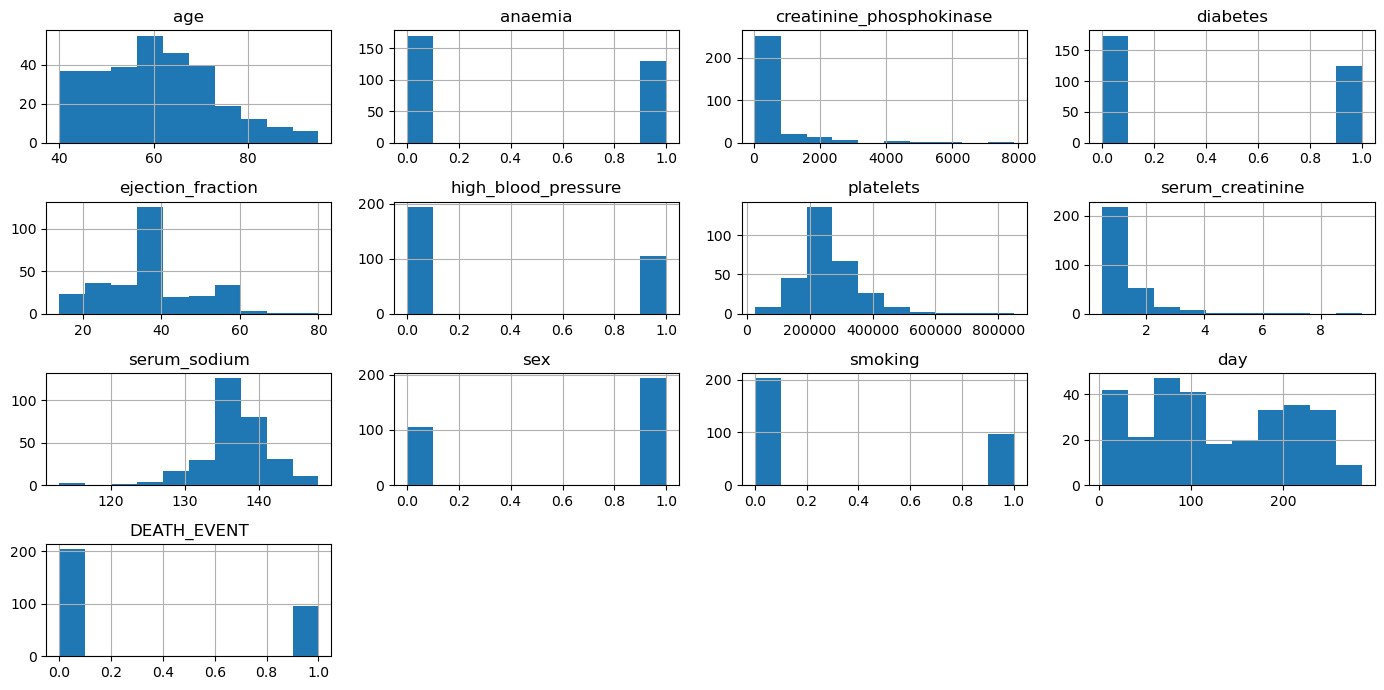

In [8]:
# Melihat persebaran data pada setiap kolom

df.hist(figsize=(14, 7))
plt.tight_layout()
plt.show()

In [9]:
# Analisis Sex pada Death Event
# 0 untuk female dan 1 untuk male

female = df[df["sex"]==0]
male = df[df["sex"]==1]

male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
         len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Sex pada Death Event")
fig.show()

**Kesimpulan**

- Ada sekitar 132 pasien male yang selamat dan ada sekitar 62 pasien male yang tidak selamat
- Ada sekitar 71 pasien female yang selamat dan ada sekitar 34 pasien female yang tidak selamat

In [10]:
# Analisis Umur Dan Gender Pada Death Event

surv = df[df["DEATH_EVENT"]==0]["age"]
not_surv = df[df["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analisis Umur Dan Gender Pada Death Event")
fig.show()

**Kesimpulan**

- Diumur 40 dan 41 semua pasien selamat
- Diumur 94 dan 95 semua pasien tidak ada yang selamat :v

In [11]:
# Analisis Pada Kolom Diabetes

labels = ['No Diabetes','Diabetes']
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Pada Kolom Diabetes")
fig.show()

In [12]:
fig = px.pie(df, values='diabetes',names='DEATH_EVENT', title='Analisis Penderita Diabetes pada Death Event')
fig.show()

In [13]:
diabetes_yes_survi = diabetes_yes[df["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[df["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[df["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[df["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[df["DEATH_EVENT"]==0]),len(diabetes_yes[df["DEATH_EVENT"]==1]),
         len(diabetes_no[df["DEATH_EVENT"]==0]),len(diabetes_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Penderita Diabetes Dan Yang Bukan Pada Death Event")
fig.show()

**Kesimpulan**

- Pada dataset, ada 41,8% pasien penderita diabetes dan 58,2% pasien yang tidak penderita diabetes
- Ada 32% dari penderita diabetes yang meninggal dan 68% penderita diabetes yang selamat
- Ada 39,5% pasien yang tidak menderita diabetes dan 28,4% pasien yang menderita diabetes yang selamat
- Ada 18,7% pasien yang tidak menderita diabetes dan 13,4% pasien yang menderita diabetes yang tidak selamat

In [14]:
# Analisis Pada Kolom Anaemia

anaemia_yes = df[df['anaemia']==1]
anaemia_no = df[df['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Pada Kolom Anaemia")
fig.show()

In [15]:
fig = px.pie(df, values='anaemia',names='DEATH_EVENT', title='Analisis Penderita Anaemia pada Death Event')
fig.show()

In [16]:
anaemia_yes_survi = anaemia_yes[df["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[df["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[df["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[df["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[df["DEATH_EVENT"]==0]),len(anaemia_yes[df["DEATH_EVENT"]==1]),
         len(anaemia_no[df["DEATH_EVENT"]==0]),len(anaemia_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Penderita Anaemia Dan Yang Bukan Pada Death Event")
fig.show()

**Kesimpulan**

- Pada dataset, ada 43,1% pasien penderita anaemia dan 56,9% pasien yang tidak penderita anaemia
- Ada 35,7% dari penderita anaemia yang meninggal dan 64,3% penderita anaemia yang selamat
- Ada 40,1% pasien yang tidak menderita anaemia dan 27,8% pasien yang menderita anaemia yang selamat
- Ada 16,7% pasien yang tidak menderita anaemia dan 15,4% pasien yang menderita anaemia yang tidak selamat

In [17]:
# Analisis Pada Kolom High Blood Pressure

hbp_yes = df[df['high_blood_pressure']==1]
hbp_no = df[df['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Pada Kolom High Blood Pressure")
fig.show()

In [18]:
fig = px.pie(df, values='high_blood_pressure',names='DEATH_EVENT', title='Analisis Penderita High Blood Pressure pada Death Event')
fig.show()

In [19]:
hbp_yes_survi = hbp_yes[df["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[df["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[df["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[df["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[df["DEATH_EVENT"]==0]),len(hbp_yes[df["DEATH_EVENT"]==1]),
         len(hbp_no[df["DEATH_EVENT"]==0]),len(hbp_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Penderita HBP Dan Yang Bukan Pada Death Event)")
fig.show()

**Kesimpulan**

- Pada dataset, ada 35,1% pasien penderita HBP dan 64,9% pasien yang tidak penderita HBP
- Ada 37,1% dari penderita HBP yang meninggal dan 62,9% penderita HBP yang selamat
- Ada 45,8% pasien yang tidak menderita HBP dan 22,1% pasien yang menderita HBP yang selamat
- Ada 19,1% pasien yang tidak menderita HBP dan 13% pasien yang menderita HBP yang tidak selamat

# Data Prepocessing

In [20]:
# df_asli tanpa membersihkan outliers

df_asli = df.copy()

   ## Outliers

In [21]:
# Fungsi untuk menghitung jumlah outliers pada suatu kolom
def hitung_outlier(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

# Loop untuk menampilkan jumlah outliers pada setiap kolom
for column in df.columns:
    if column != 'DEATH_EVENT':
        jumlah_outlier = hitung_outlier(column)
        print(f'Pada kolom {column}, jumlah outliernya adalah {jumlah_outlier}')

Pada kolom age, jumlah outliernya adalah 0
Pada kolom anaemia, jumlah outliernya adalah 0
Pada kolom creatinine_phosphokinase, jumlah outliernya adalah 29
Pada kolom diabetes, jumlah outliernya adalah 0
Pada kolom ejection_fraction, jumlah outliernya adalah 2
Pada kolom high_blood_pressure, jumlah outliernya adalah 0
Pada kolom platelets, jumlah outliernya adalah 21
Pada kolom serum_creatinine, jumlah outliernya adalah 29
Pada kolom serum_sodium, jumlah outliernya adalah 4
Pada kolom sex, jumlah outliernya adalah 0
Pada kolom smoking, jumlah outliernya adalah 0
Pada kolom day, jumlah outliernya adalah 0


**Keterangan**</br>
Tidak semua nilai outlier harus dihapus tanpa pertimbangan yang matang, karena tindakan tersebut tidak selalu berkontribusi pada peningkatan akurasi. Dalam proyek ini, keputusan diambil untuk menghapus outlier yang terdapat pada kolom **ejection_fraction** dan **serum_sodium**, sedangkan nilai-nilai dalam creatinine_phosphokinase, platelets, dan serum_creatinine dianggap sebagai titik data aktual yang berada dalam rentang nilai yang dapat memberikan kontribusi dalam memprediksi DEATH_EVENT. 

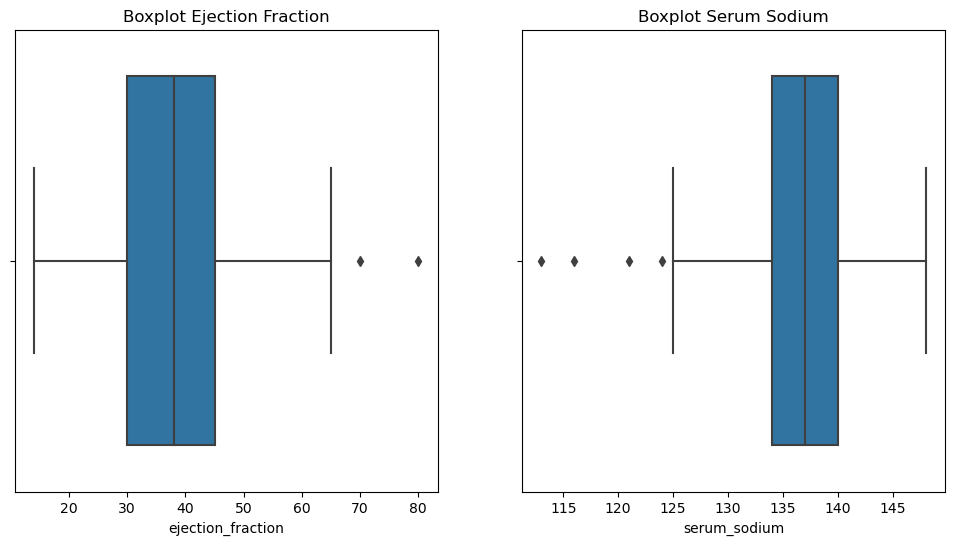

In [22]:
# Plot boxplot untuk kolom ejection_fraction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['ejection_fraction'])
plt.title('Boxplot Ejection Fraction')

# Plot boxplot untuk kolom serum_sodium
plt.subplot(1, 2, 2)
sns.boxplot(x=df['serum_sodium'])
plt.title('Boxplot Serum Sodium')

# Tampilkan plot
plt.show()

**Keterangan :** </br>
- Outlier pada ejaction_fraction yaitu melebihi Q3
- Outlier pada serum sodium kurang dari Q1

In [23]:
# Hitung quartil untuk kolom ejection_fraction
Q1_ef, Q2_ef, Q3_ef = df['ejection_fraction'].quantile([0.25, 0.5, 0.75])
range_ef = Q3_ef - Q1_ef

# Hitung quartil untuk kolom serum_sodium
Q1_ss, Q2_ss, Q3_ss = df['serum_sodium'].quantile([0.25, 0.5, 0.75])
range_ss = Q3_ss - Q1_ss

print(f"Quartil untuk kolom ejection_fraction: Q1 = {Q1_ef}, Median = {Q2_ef}, Q3 = {Q3_ef}, Range = {range_ef}")
print(f"Quartil untuk kolom serum_sodium: Q1 = {Q1_ss}, Median = {Q2_ss}, Q3 = {Q3_ss}, Range = {range_ss}")

Quartil untuk kolom ejection_fraction: Q1 = 30.0, Median = 38.0, Q3 = 45.0, Range = 15.0
Quartil untuk kolom serum_sodium: Q1 = 134.0, Median = 137.0, Q3 = 140.0, Range = 6.0


In [24]:
# memfilter outlier ejection fraction
df[df['ejection_fraction'] > (Q3_ef + (1.5 * range_ef))]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,day,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [25]:
# memfilter outlier serum_sodium
df[df['serum_sodium'] < (Q1_ss - (1.5 * range_ss))]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,day,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
19,48.0,1,582,1,55,0,87000.00,1.9,121,0,0,15,1
126,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
199,60.0,0,1211,1,35,0,263358.03,1.8,113,1,1,186,0


In [26]:
print('Data sebelum di hilangkan outliernya :', df.shape)

# menghapus outlier
df = df[~((df['ejection_fraction'] > (Q3_ef + (1.5 * range_ef))))]
df = df[~((df['serum_sodium'] < (Q1_ss - (1.5 * range_ss))))]

print('Data sesudah dihilangkan outliernya :', df.shape)

Data sebelum di hilangkan outliernya : (299, 13)
Data sesudah dihilangkan outliernya : (293, 13)


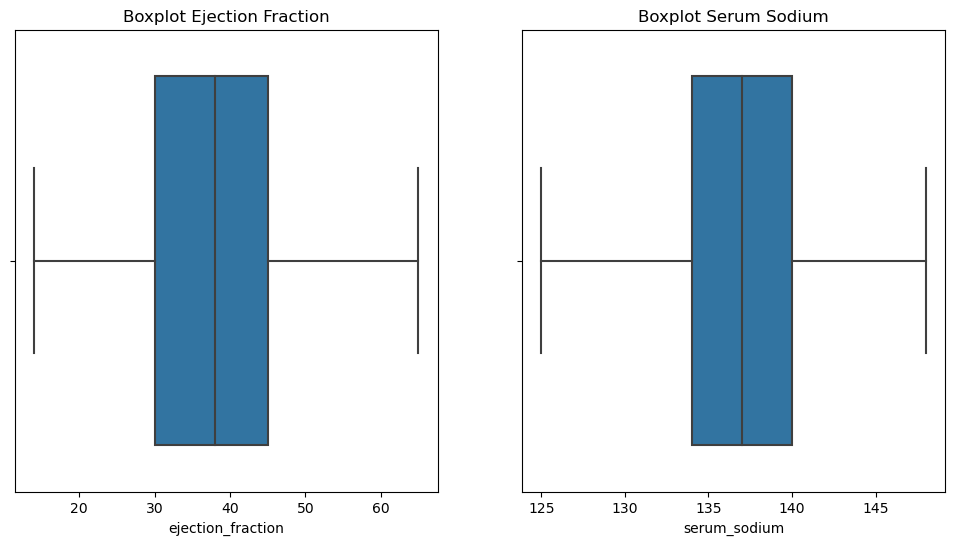

In [27]:
# Plot boxplot untuk kolom ejection_fraction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['ejection_fraction'])
plt.title('Boxplot Ejection Fraction')

# Plot boxplot untuk kolom serum_sodium
plt.subplot(1, 2, 2)
sns.boxplot(x=df['serum_sodium'])
plt.title('Boxplot Serum Sodium')

# Tampilkan plot
plt.show()

# Data Modeling

In [28]:
# Memisahkan antara features dan target df (sudah dibersihan outliersnya)

Features = ['age','anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','serum_sodium','sex','smoking','day','ejection_fraction','serum_creatinine']
X = df[Features]
y = df["DEATH_EVENT"]

print (f'Dimensi Features : {X.shape}')
print (f'Class : {set(y)}')

Dimensi Features : (293, 12)
Class : {0, 1}


In [29]:
# Memisahkan antara features dan target df_asli (tidak dibersihan outliersnya)

Features = ['age','anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','serum_sodium','sex','smoking','day','ejection_fraction','serum_creatinine']
X_asli = df_asli[Features]
y_asli = df_asli["DEATH_EVENT"]

print (f'Dimensi Features : {X.shape}')
print (f'Class : {set(y)}')

Dimensi Features : (293, 12)
Class : {0, 1}


**Split data**

In [30]:
# Membagi data menjadi 80% data train dan 20% data test df

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [31]:
# Membagi data menjadi 80% data train dan 20% data test df_asli

X_train_asli,X_test_asli,y_train_asli,y_test_asli = train_test_split(X_asli,y_asli, test_size=0.2, random_state=0)

**StandardScaler()**

In [32]:
# Standarisasi variabel X df

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Standarisasi variabel X df_asli

scaler = StandardScaler()
X_train_asli = scaler.fit_transform(X_train_asli)
X_test_asli = scaler.transform(X_test_asli)

**Modeling**

In [34]:
# Melatih model df

model = RandomForestClassifier(n_estimators =100,
                               random_state = 3)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=3)

In [35]:
# Melatih model df_asli

model_asli = RandomForestClassifier(n_estimators =100,
                               random_state = 3)

model_asli.fit(X_train_asli, y_train_asli)

RandomForestClassifier(random_state=3)

**Akurasi, Classification Report, Dan Confusion Matrix**

In [36]:
# Melihat akurasi model df

accuracy_list = []
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
accuracy_list.append(100*acc)

In [37]:
print(Fore.GREEN + "Akurasi Random Forest Classifier df : ", "{:.2f}%".format(100* acc))

Akurasi Random Forest Classifier df :  89.83%


In [38]:
# Melihat Classification report df

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        44
           1       1.00      0.60      0.75        15

    accuracy                           0.90        59
   macro avg       0.94      0.80      0.84        59
weighted avg       0.91      0.90      0.89        59



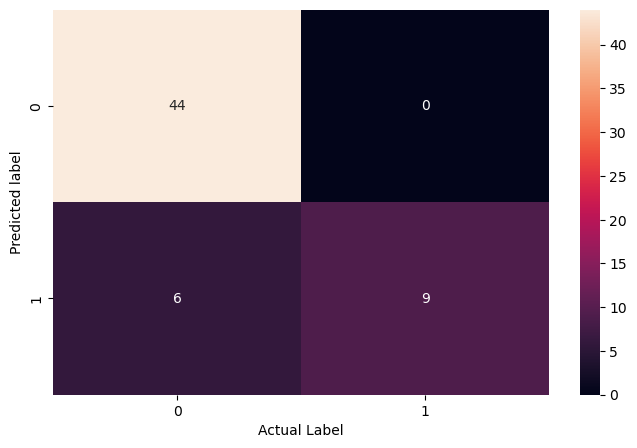

In [39]:
# Membuat Confusion Matrix

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Actual Label")
plt.ylabel("Predicted label")
plt.show()

In [40]:
# Melihat akurasi model df_asli

accuracy_list = []
y_pred_asli = model_asli.predict(X_test_asli)
acc_asli = accuracy_score(y_test_asli, y_pred_asli)
accuracy_list.append(100*acc_asli)

In [41]:
print(Fore.GREEN + "Akurasi Random Forest Classifier df_asli : ", "{:.2f}%".format(100* acc_asli))

Akurasi Random Forest Classifier df_asli :  85.00%


In [42]:
# Melihat Classification report df_asli

y_pred_asli = model_asli.predict(X_test_asli)

print(classification_report(y_test_asli, y_pred_asli))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



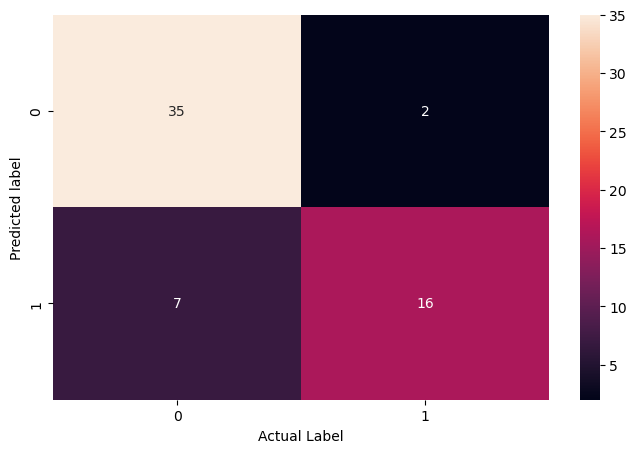

In [43]:
# Membuat Confusion Matrix

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_asli, y_pred_asli), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Actual Label")
plt.ylabel("Predicted label")
plt.show()

**Kesimpulan**

   Model yang menggunakan dataset df (Outliersnya dibersihkan) menghasilkan akurasi 89,33% dan lebih baik dari pada model yang
menggunakan dataset df_asli (Tidak dibersihkan Outliersnya) yang akurasinya 85%.

In [44]:
# Mencoba model dengan data yg baru 

new_data = {
    'age': [40,95],
    'anaemia': [0,1],
    'creatinine_phosphokinase': [23,7861],
    'diabetes': [0,1],
    'high_blood_pressure': [0,1],
    'platelets': [25100,850000],
    'serum_sodium': [113,148],
    'sex': [1,0],
    'smoking': [0,1],
    'day': [4,30],
    'ejection_fraction': [14,80],
    'serum_creatinine': [0.5,9.4]
}

new_data = pd.DataFrame(new_data)
new_data

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_sodium,sex,smoking,day,ejection_fraction,serum_creatinine
0,40,0,23,0,0,25100,113,1,0,4,14,0.5
1,95,1,7861,1,1,850000,148,0,1,30,80,9.4


In [45]:
# Disini kami memprediksi new_data diatas menggunakan model yang df (Dibersihkan outliersnya)

prediksi = model.predict(new_data)
prediksi

array([0, 1], dtype=int64)

# Kesimpulan

Didalam dataset "heart_failure_clinical_records_dataset.csv," terdapat 13 atribut yang memiliki potensi risiko 
terkena gagal jantung. Semua faktor seperti usia,keberadaan anemia, tekanan darah tinggi, dan variabel lainnya 
menjadi fokus utama dalam analisis ini. Kami sudah mempersiapkan data dan juga membersihkan datanya sebelum melakukan
pemodelan. setelah itu kami melakukan pemodelan menggunakan model random forest dan menghasilkan akurasi 85%.
ada confusion matrix yang menunjukkan seberapa mampunya model memprediksi secara benar. Model Random Forest Ensemble 
mampu mengantisipasi risiko gagal jantung dengan tingkat akurasi yang tinggi. Kinerja model ini menonjol dalam mengenali 
pasien yang memiliki potensi mengalami gagal jantung. Meskipun demikian, perlu dilakukan interpretasi dengan hati-hati, dan diperlukan pertimbangan lebih lanjut sebelum mengaplikasikannya dalam pengambilan keputusan klinis yang faktual.